<a href="https://colab.research.google.com/github/MehrdadJalali-AI/LotusEffectAlgorithm/blob/main/benchmark_functions_3d_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3D Plots of Benchmark Functions
This notebook visualizes 14 benchmark functions used in optimization research. Each function is plotted in 3D.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_function(func, x_range, y_range, title):
    X = np.linspace(*x_range, 200)
    Y = np.linspace(*y_range, 200)
    X, Y = np.meshgrid(X, Y)
    Z = func(X, Y)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    plt.tight_layout(pad=2.0)

    plt.show()

In [16]:
# Function Definitions
def ackley(X, Y, a=20, b=0.2, c=2*np.pi):
    d = 2
    part1 = -a * np.exp(-b * np.sqrt((X**2 + Y**2)/d))
    part2 = -np.exp((np.cos(c*X) + np.cos(c*Y))/d)
    return part1 + part2 + a + np.exp(1)

def six_hump_camel(X, Y):
    return (4 - 2.1 * X**2 + (X**4)/3) * X**2 + X * Y + (-4 + 4 * Y**2) * Y**2

def himmelblau(X, Y):
    return (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2

def shubert(X, Y):
    sum1 = np.sum([i * np.cos((i + 1) * X + i) for i in range(1, 6)], axis=0)
    sum2 = np.sum([j * np.cos((j + 1) * Y + j) for j in range(1, 6)], axis=0)
    return sum1 * sum2

def decreasing_maxima(X, Y):
    X = np.clip(X, 0.00001, 1)
    term1 = np.exp(-2 * np.log(2) * (X - 0.08) / 0.854)
    term2 = np.sin(5 * np.pi * (X**(3/4) - 0.05))**6
    return term1 * term2

def equal_maxima(X, Y):
    return np.sin(5 * np.pi * X)**6

def modified_rastrigin(X, Y):
    return 10 + 9 * np.cos(2 * np.pi * X) + 10 + 9 * np.cos(2 * np.pi * Y)

def vincent(X, Y):
    X = np.clip(X, 0.0001, 1)
    Y = np.clip(Y, 0.0001, 1)
    return np.sin(10 * np.log(X)) + np.sin(10 * np.log(Y))

def five_uneven_peak_trap(X, Y):
    def trap_func(x):
        if x < 0: return -200 + x**2
        elif x < 2.5: return -80 * (2.5 - x)
        elif x < 5: return -64 * (x - 2.5)
        elif x < 7.5: return -64 * (7.5 - x)
        elif x < 12.5: return -28 * (x - 7.5)
        elif x < 17.5: return -28 * (17.5 - x)
        elif x < 22.5: return -32 * (x - 17.5)
        elif x < 27.5: return -32 * (27.5 - x)
        elif x <= 30: return -80 * (x - 27.5)
        else: return -200 + (x - 30)**2
    vfunc = np.vectorize(trap_func)
    return 700 * (vfunc(X) + vfunc(Y)) + 400

def expanded_equal_maxima(X, Y):
    def t_i(y):
        return y**2 if y < 0 or y > 1 else np.sin(5 * np.pi * y)**6
    t_func = np.vectorize(t_i)
    return 307 - (t_func(X) + t_func(Y)) + 2

def expanded_uneven_maxima(X, Y):
    def t_i(y):
        return y**2 if y < 0 or y > 1 else np.sin(5 * np.pi * (y**(3/4) - 0.05))**6
    t_func = np.vectorize(t_i)
    return 508 - (t_func(X) + t_func(Y)) + 2

def modified_vincent(X, Y):
    def t_i(y):
        if y < 0.25: return (0.25 - y)**2 + np.sin(10 * np.log(2.5))
        elif y <= 10: return np.sin(10 * np.log(y))
        else: return (y - 10)**2 + np.sin(10 * np.log(10))
    t_func = np.vectorize(t_i)
    return 805 - 0.5 * (t_func(X) + t_func(Y)) + 1.0

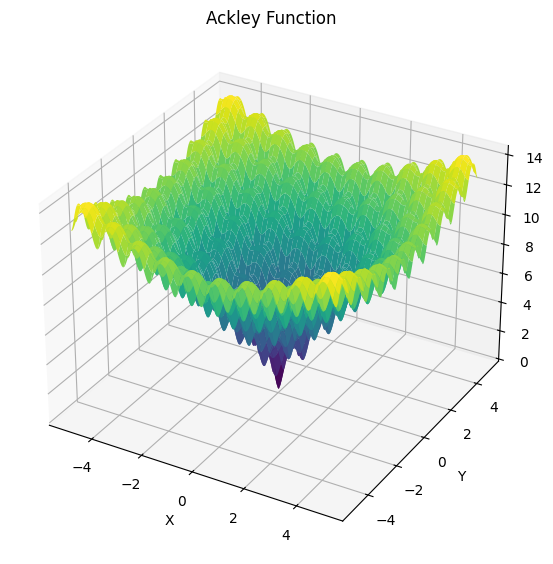

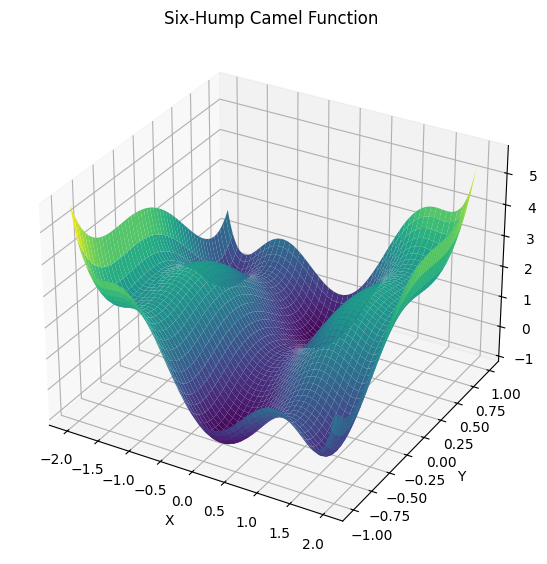

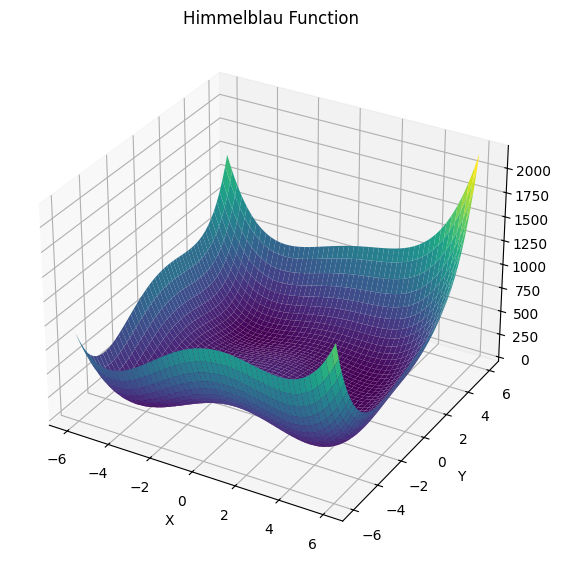

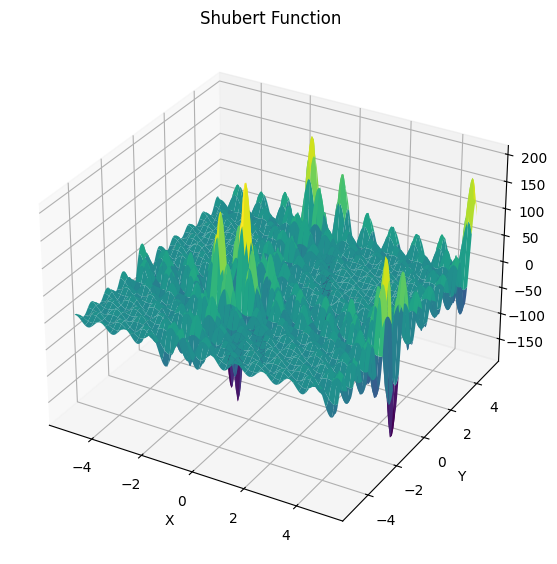

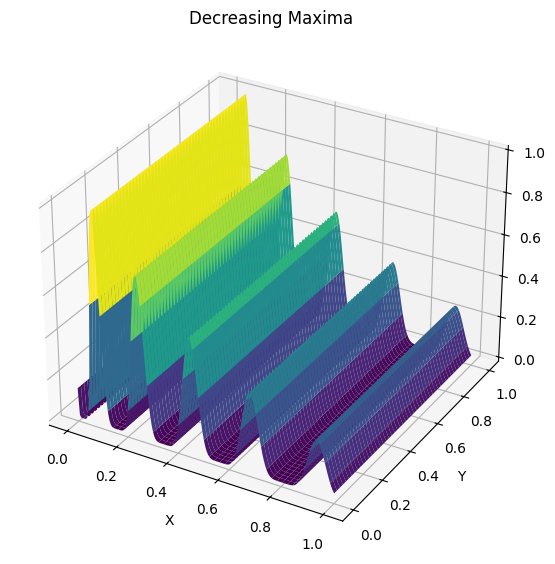

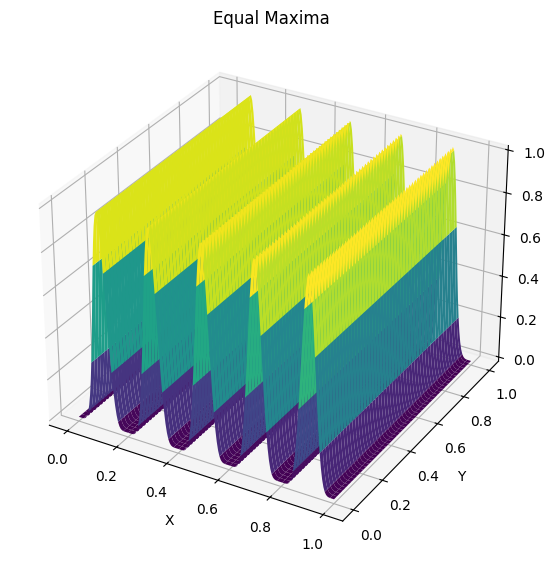

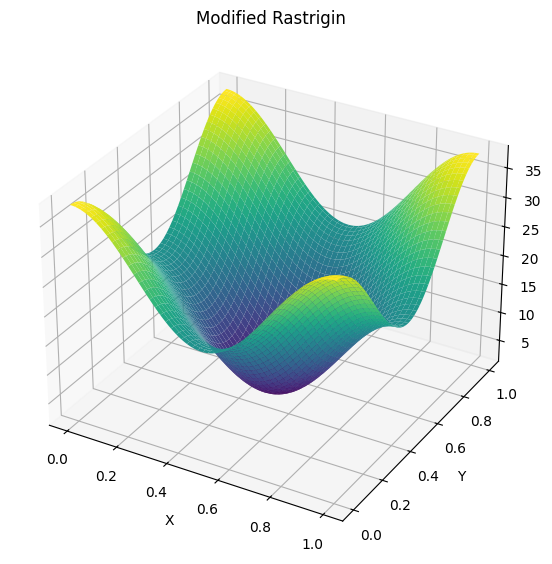

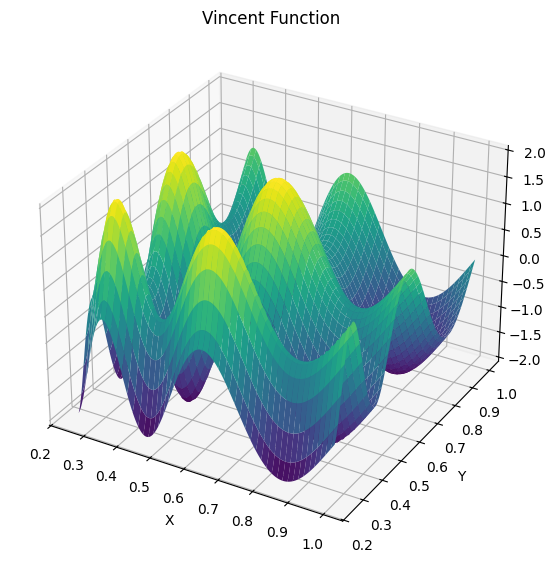

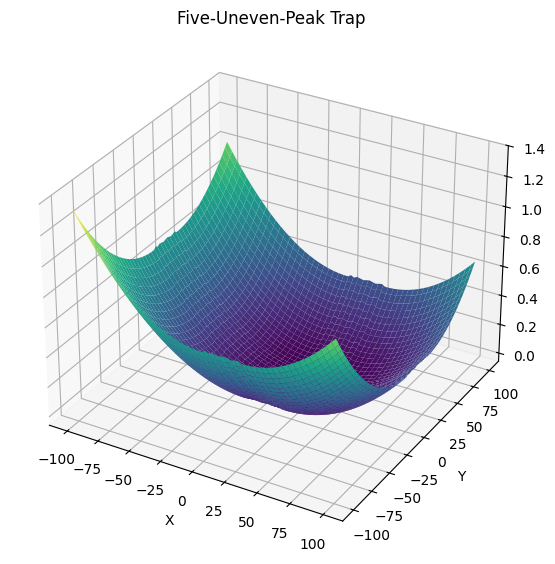

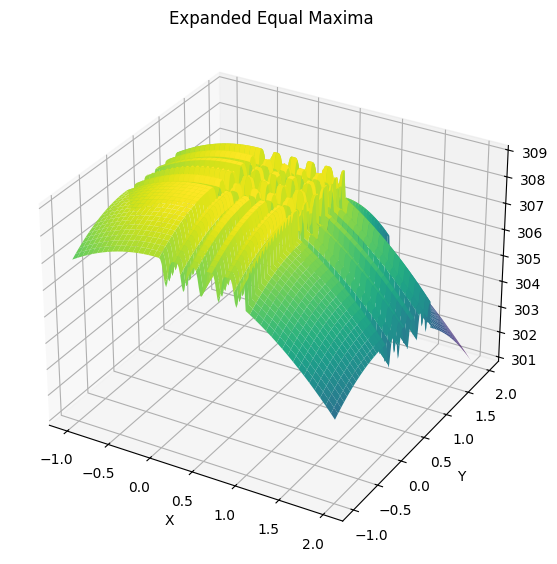

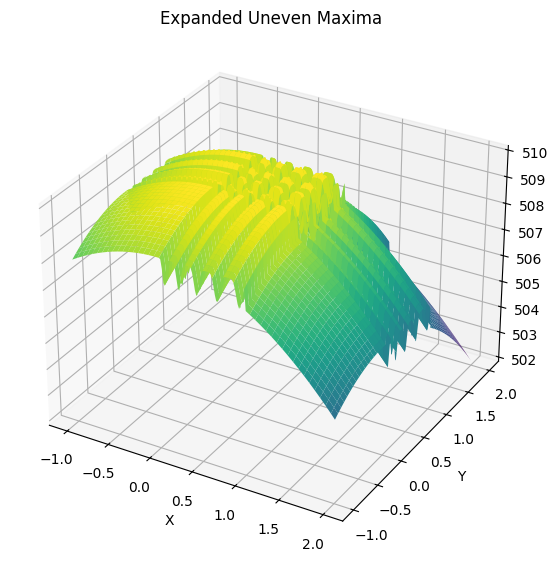

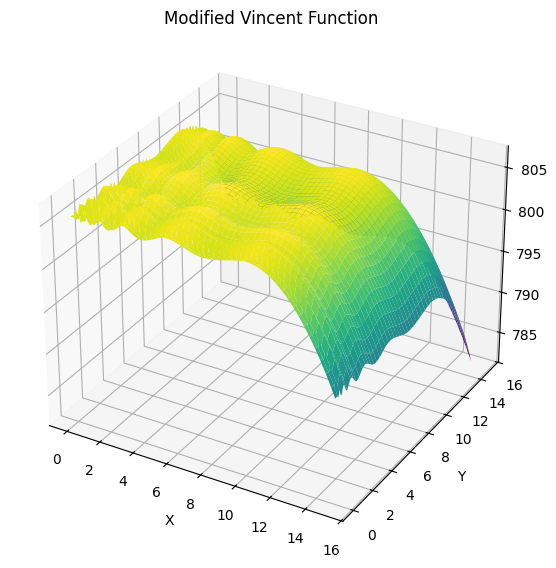

In [17]:
# Plot all 14 functions
plot_function(ackley, (-5, 5), (-5, 5), 'Ackley Function')
plot_function(six_hump_camel, (-2, 2), (-1, 1), 'Six-Hump Camel Function')
plot_function(himmelblau, (-6, 6), (-6, 6), 'Himmelblau Function')
plot_function(shubert, (-5, 5), (-5, 5), 'Shubert Function')
plot_function(decreasing_maxima, (0, 1), (0, 1), 'Decreasing Maxima')
plot_function(equal_maxima, (0, 1), (0, 1), 'Equal Maxima')
plot_function(modified_rastrigin, (0, 1), (0, 1), 'Modified Rastrigin')
plot_function(vincent, (0.25, 1), (0.25, 1), 'Vincent Function')
plot_function(five_uneven_peak_trap, (-100, 100), (-100, 100), 'Five-Uneven-Peak Trap')
plot_function(expanded_equal_maxima, (-1, 2), (-1, 2), 'Expanded Equal Maxima')
plot_function(expanded_uneven_maxima, (-1, 2), (-1, 2), 'Expanded Uneven Maxima')
plot_function(modified_vincent, (0.01, 15), (0.01, 15), 'Modified Vincent Function')